# PYTHON IMPLEMENTATION

Problem Statement:
    
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#delete unwanted columns
data=data.drop(['Loan_ID','Gender'],axis=1)
data=data.drop(['Dependents'],axis=1)

In [4]:
data.shape

(614, 10)

In [5]:
data.isnull().sum()

Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#removing null values
data["Married"]=data["Married"].fillna(data["Married"].mode()[0])
data["Self_Employed"]=data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])
data["LoanAmount"]=data["LoanAmount"].fillna(data["LoanAmount"].mean())
data["Loan_Amount_Term"]=data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0])
data["Credit_History"]=data["Credit_History"].fillna(data["Credit_History"].mode()[0])

In [7]:
data.isnull().sum()

Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
data["Married"]=le.fit_transform(data["Married"])
data["Education"]=le.fit_transform(data["Education"])
data["Self_Employed"]=le.fit_transform(data["Self_Employed"])
data["Property_Area"]=le.fit_transform(data["Property_Area"])
data["Loan_Status"]=le.fit_transform(data["Loan_Status"])

In [11]:
data

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,0,0,7583,0.0,187.000000,360.0,1.0,2,1


# checking correlation

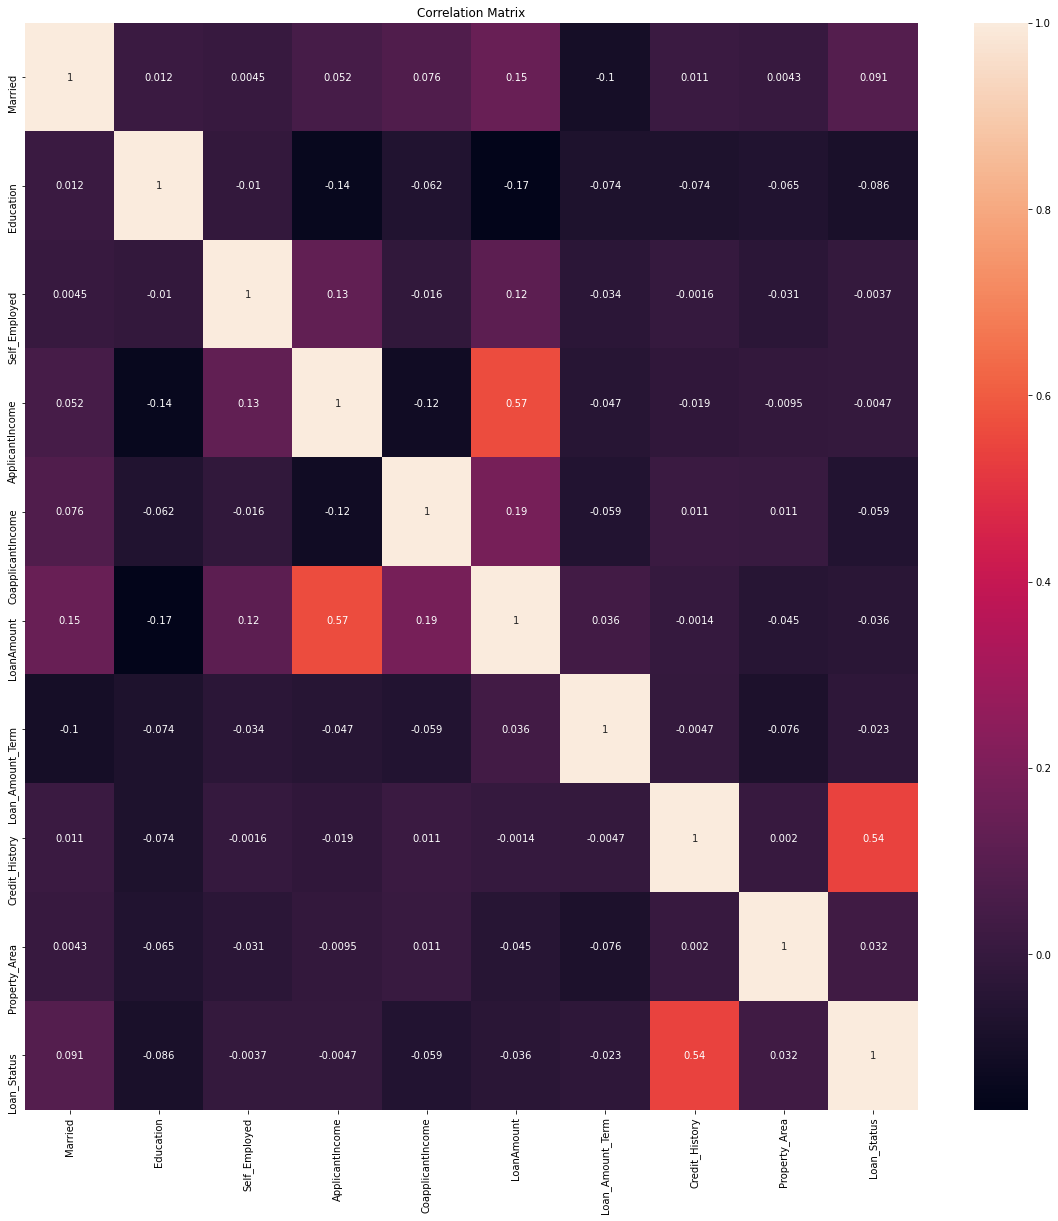

In [12]:
data.corr()
corr_mat=data.corr()

#size of the canvas
plt.figure(figsize=([20,20]))

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [13]:
corr_mat["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

now we can clearly identify the correlation of independent variable with target variable

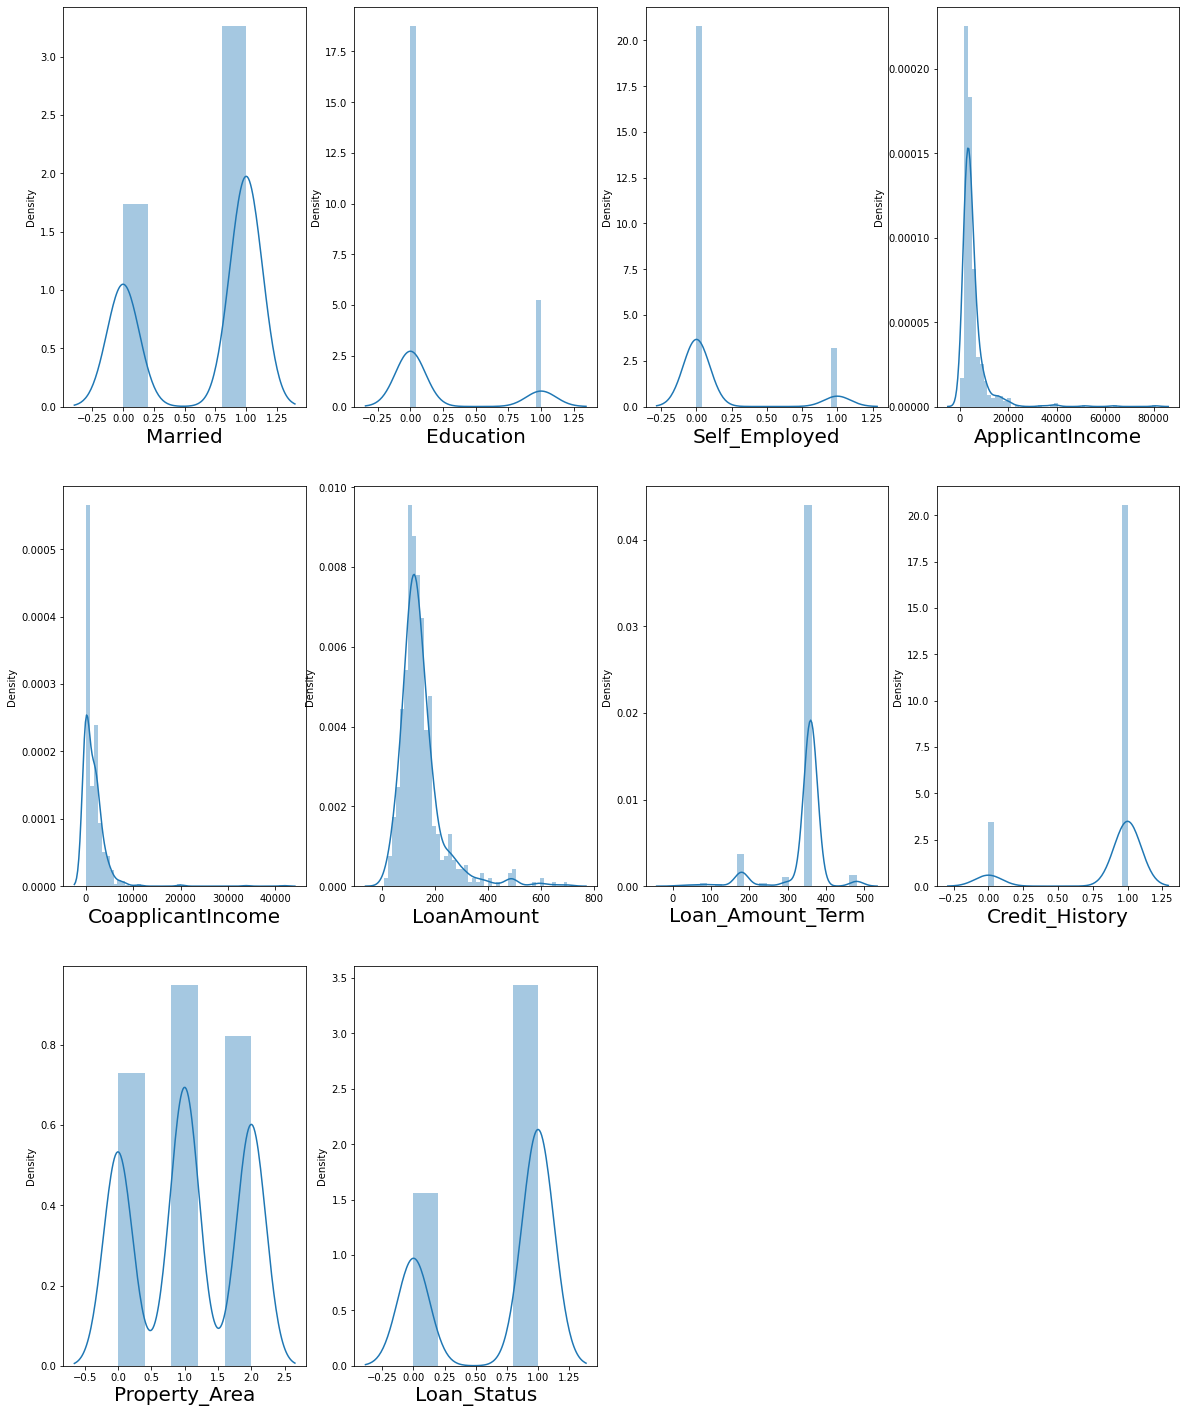

In [14]:
#let's see how data is distributed for every column
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()      

lets split the data into target and independent variable and check for skewness

In [15]:
#spliting data into independent and dependent variable
x=data.drop(['Loan_Status'],axis=1)
y=data["Loan_Status"]

In [16]:
x

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,0,0,7583,0.0,187.000000,360.0,1.0,2


In [17]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [18]:
#checking skewness
x.skew().sort_values()

Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Married             -0.644850
Property_Area       -0.066196
Education            1.367622
Self_Employed        2.159796
LoanAmount           2.726601
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
dtype: float64

columns are highly skewed lets treat them using power_transform

In [19]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [20]:
x

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.372089,-0.528362,-0.392601,0.544331,-1.102837,0.235387,0.175540,0.411733,1.193567
1,0.728816,-0.528362,-0.392601,0.170974,0.750578,-0.037659,0.175540,0.411733,-1.350003
2,0.728816,-0.528362,2.547117,-0.499955,-1.102837,-1.346305,0.175540,0.411733,1.193567
3,0.728816,1.892641,-0.392601,-0.743873,0.891686,-0.167886,0.175540,0.411733,1.193567
4,-1.372089,-0.528362,-0.392601,0.582817,-1.102837,0.158610,0.175540,0.411733,1.193567
...,...,...,...,...,...,...,...,...,...
609,-1.372089,-0.528362,-0.392601,-0.554885,-1.102837,-1.205100,0.175540,0.411733,-1.350003
610,0.728816,-0.528362,-0.392601,-0.000290,-1.102837,-2.293317,-2.312879,0.411733,-1.350003
611,0.728816,-0.528362,-0.392601,1.023487,0.208603,1.372409,0.175540,0.411733,1.193567
612,0.728816,-0.528362,-0.392601,0.931750,-1.102837,0.738924,0.175540,0.411733,1.193567


In [21]:
#validating that skewness is removed or not
x.skew().sort_values()

Credit_History      -2.021971
Married             -0.644850
Property_Area       -0.158267
CoapplicantIncome   -0.145646
ApplicantIncome     -0.092946
LoanAmount           0.024376
Loan_Amount_Term     0.392571
Education            1.367622
Self_Employed        2.159796
dtype: float64

skeweed columns are categorical so lets proceed further

# checking outliers

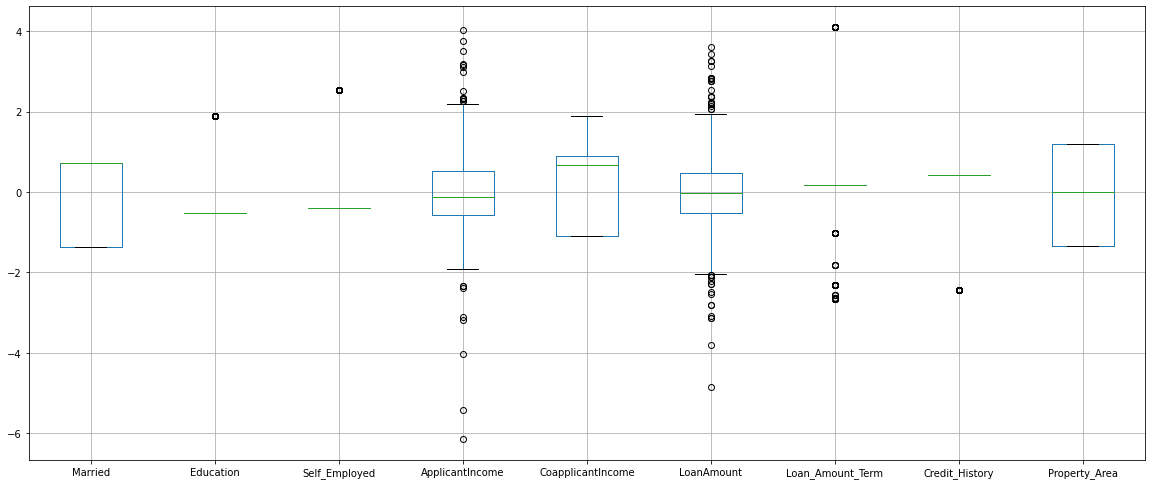

In [22]:
#plotting boxplot for columns
x.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

some columns having outliers so lets treat them

In [23]:
#find the IQR (inter quantile range) to identify outliers

#1St quantile
q1=data.quantile(0.25)

#3rd quantile
q3=data.quantile(0.75)

#IOR
iqr=q3-q1

In [24]:
q1

Married                 0.00
Education               0.00
Self_Employed           0.00
ApplicantIncome      2877.50
CoapplicantIncome       0.00
LoanAmount            100.25
Loan_Amount_Term      360.00
Credit_History          1.00
Property_Area           0.00
Loan_Status             0.00
Name: 0.25, dtype: float64

In [25]:
q3

Married                 1.00
Education               0.00
Self_Employed           0.00
ApplicantIncome      5795.00
CoapplicantIncome    2297.25
LoanAmount            164.75
Loan_Amount_Term      360.00
Credit_History          1.00
Property_Area           2.00
Loan_Status             1.00
Name: 0.75, dtype: float64

In [26]:
iqr

Married                 1.00
Education               0.00
Self_Employed           0.00
ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
Loan_Amount_Term        0.00
Credit_History          0.00
Property_Area           2.00
Loan_Status             1.00
dtype: float64

# OUTLIER DETECTION FORMULA

# higher side ==> Q3+(1.5*IQR)

# lower side ==> Q1-(1.5*IQR)

In [27]:
#validating one outlier

ApplicantIncome_high=(q3.ApplicantIncome+(1.5*iqr.ApplicantIncome))
ApplicantIncome_high

index=np.where(data['ApplicantIncome']>ApplicantIncome_high)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

,index,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
559,609,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
560,610,1,0,0,4106,0.0,40.000000,180.0,1.0,0,1
561,611,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
562,612,1,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [28]:
ApplicantIncome_low=(q3.ApplicantIncome-(1.5*iqr.ApplicantIncome))
ApplicantIncome_low

index=np.where(data['ApplicantIncome']<ApplicantIncome_low)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

,index,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
549,609,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
550,610,1,0,0,4106,0.0,40.000000,180.0,1.0,0,1
551,611,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
552,612,1,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [29]:
LoanAmount_high=(q3.LoanAmount+(1.5*iqr.LoanAmount))
LoanAmount_high

index=np.where(data['LoanAmount']>LoanAmount_high)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

,index,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
531,609,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
532,610,1,0,0,4106,0.0,40.000000,180.0,1.0,0,1
533,611,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
534,612,1,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [30]:
LoanAmount_low=(q3.LoanAmount-(1.5*iqr.LoanAmount))
LoanAmount_low

index=np.where(data['LoanAmount']<LoanAmount_low)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

,index,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,3,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
3,4,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
4,6,1,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
486,608,1,0,0,3232,1950.0,108.000000,360.0,1.0,0,1
487,609,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
488,611,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
489,612,1,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [31]:
Loan_Amount_Term_low=(q3.Loan_Amount_Term-(1.5*iqr.Loan_Amount_Term))
Loan_Amount_Term_low

index=np.where(data['Loan_Amount_Term']<Loan_Amount_Term_low)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

,index,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,3,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
3,4,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
4,6,1,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
434,608,1,0,0,3232,1950.0,108.000000,360.0,1.0,0,1
435,609,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
436,611,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
437,612,1,0,0,7583,0.0,187.000000,360.0,1.0,2,1


now we have delt with the outliers

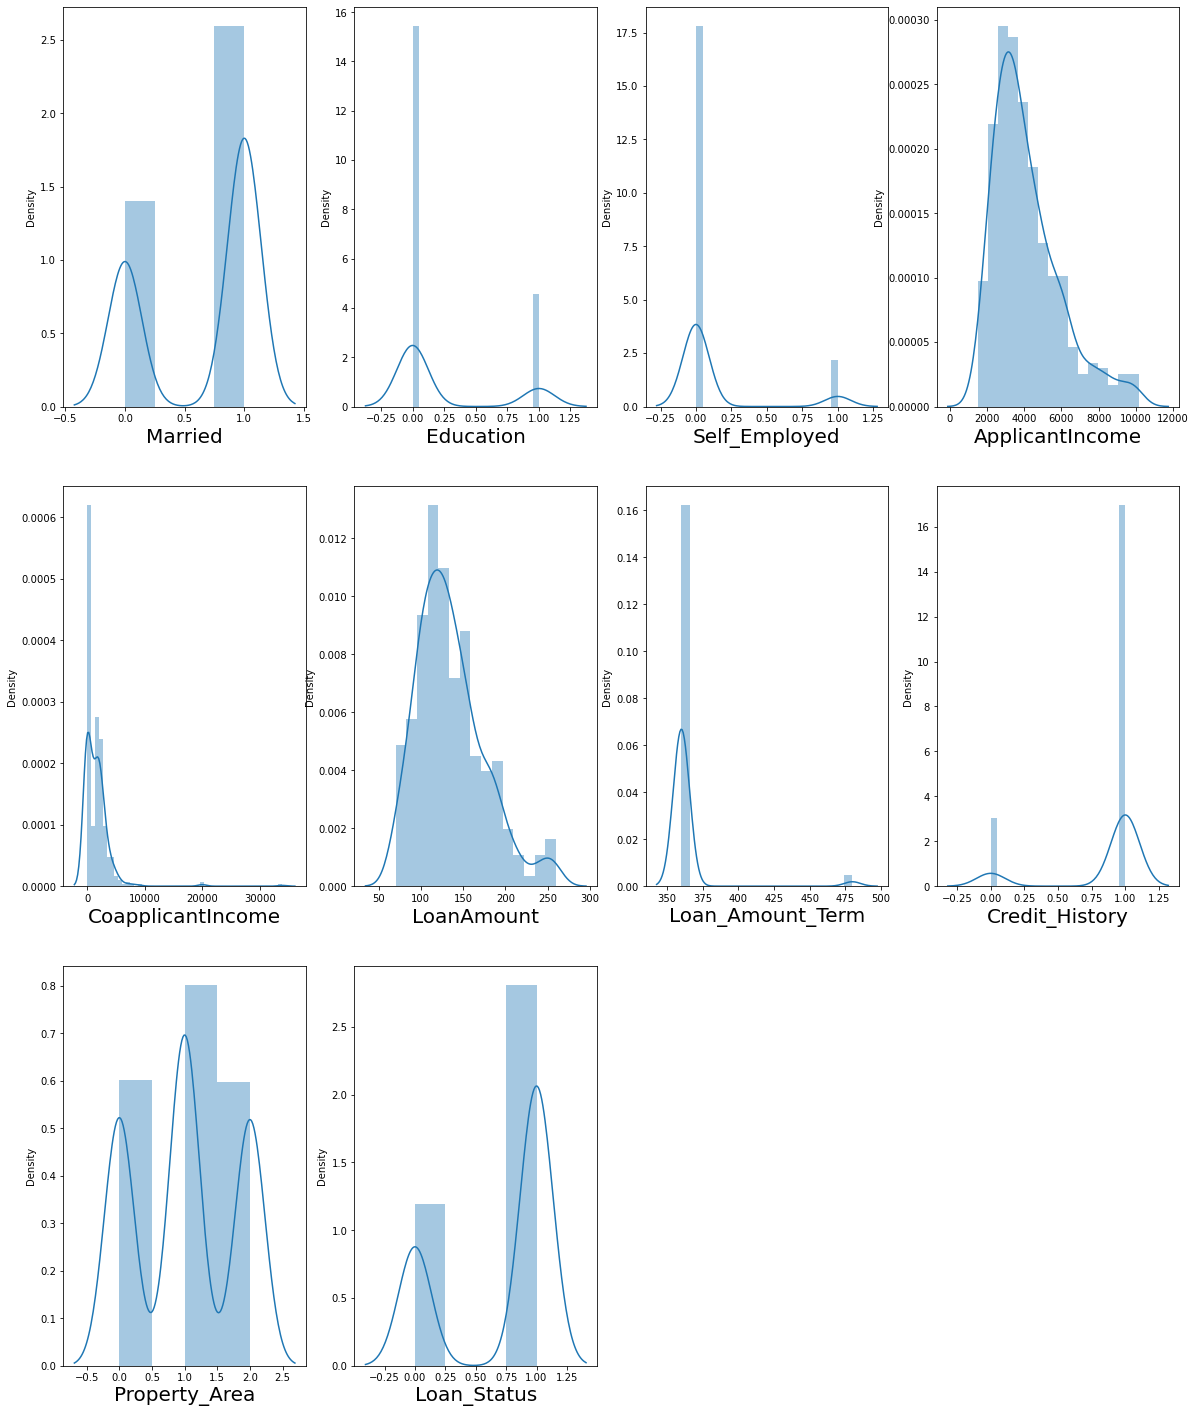

In [32]:
#lets plot the data now
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

now data is looking much better than before so lets proceed further

before we fit our data to a model . let's visualize the relationship between our independent variables and the categories

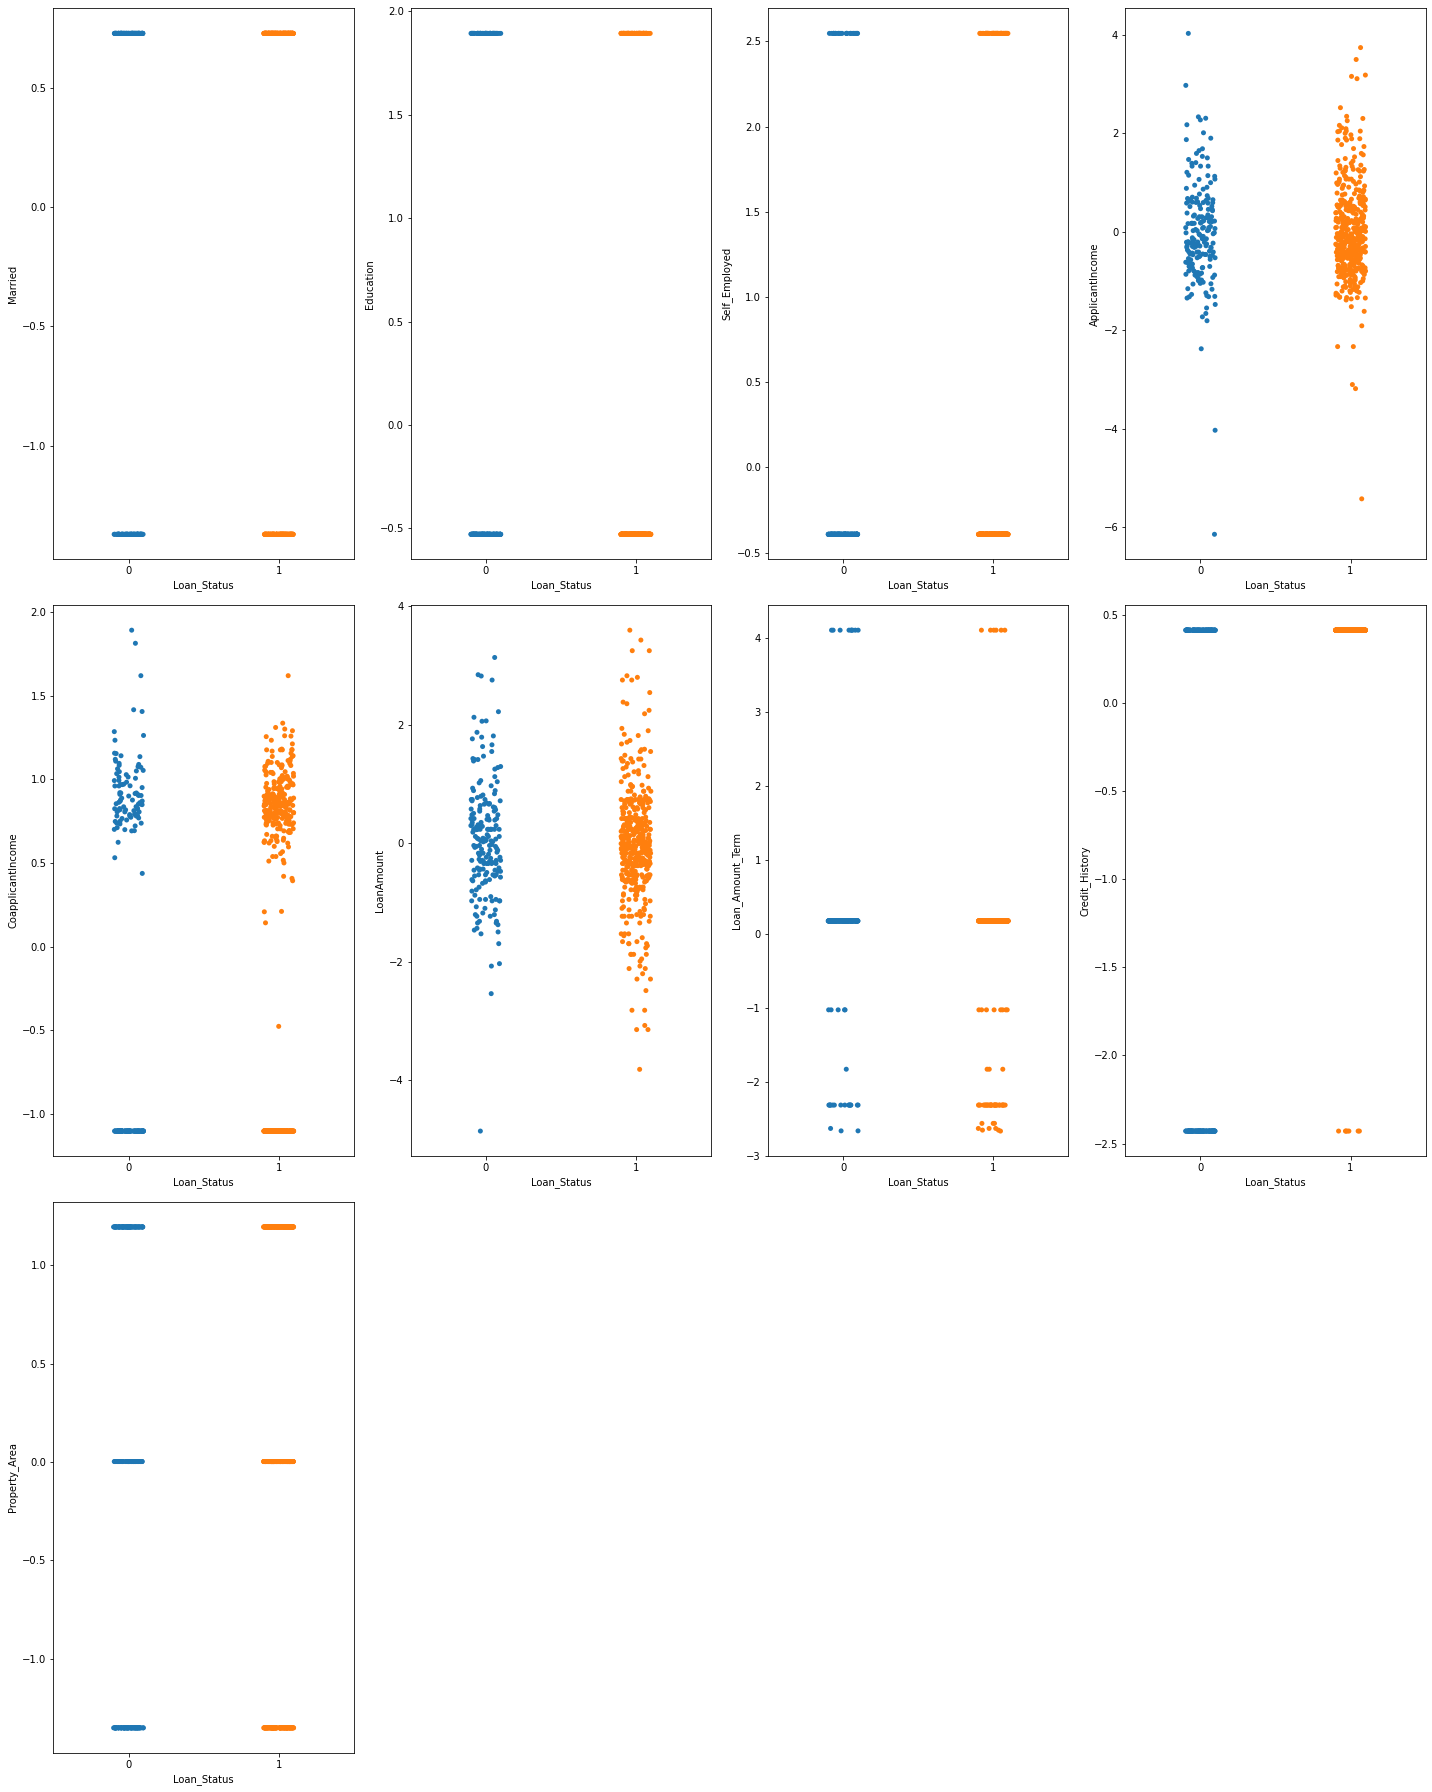

In [33]:
#let's see how features are related to class
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()


greta let's proceed by checking multicollinearity in the dependent variables. before that we should scale our data. let's use standard scalar for that

# Data Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [35]:
x_scaled

array([[-1.37208932e+00, -5.28362249e-01, -3.92600737e-01, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00],
       [ 7.28815525e-01, -5.28362249e-01, -3.92600737e-01, ...,
         1.75540037e-01,  4.11732692e-01, -1.35000343e+00],
       [ 7.28815525e-01, -5.28362249e-01,  2.54711697e+00, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00],
       ...,
       [ 7.28815525e-01, -5.28362249e-01, -3.92600737e-01, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00],
       [ 7.28815525e-01, -5.28362249e-01, -3.92600737e-01, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00],
       [-1.37208932e+00, -5.28362249e-01,  2.54711697e+00, ...,
         1.75540037e-01, -2.42876026e+00,  2.36103342e-03]])

finding variance inflation factor in each scaled column i.e. x_scaled1

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif["Features"]=x.columns

#let's check the values
vif

,vif,Features
0,1.162689,Married
1,1.056548,Education
2,1.040002,Self_Employed
3,1.815774,ApplicantIncome
4,1.492519,CoapplicantIncome
5,1.580281,LoanAmount
6,1.040194,Loan_Amount_Term
7,1.007465,Credit_History
8,1.020419,Property_Area


all the vif values are less than 5 and are very low. that means no multicollinearity. now, we can go ahead with fitting our data to the model. before that let's split our data in test and training set

# Training Process

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [38]:
#find best random state for train_test_split
maxAccu=0       #maximum accuracy
maxRS=0         #best random state

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"on random_state",maxRS)

Best Accuracy is 0.8701298701298701 on random_state 63


# creating train test split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=63)

In [40]:
x_train

array([[-1.37208932e+00, -5.28362249e-01, -3.92600737e-01, ...,
         1.75540037e-01,  4.11732692e-01, -1.35000343e+00],
       [ 7.28815525e-01, -5.28362249e-01, -3.92600737e-01, ...,
        -2.31287945e+00,  4.11732692e-01,  2.36103342e-03],
       [ 7.28815525e-01, -5.28362249e-01, -3.92600737e-01, ...,
         1.75540037e-01,  4.11732692e-01, -1.35000343e+00],
       ...,
       [ 7.28815525e-01,  1.89264089e+00, -3.92600737e-01, ...,
         1.75540037e-01,  4.11732692e-01, -1.35000343e+00],
       [ 7.28815525e-01, -5.28362249e-01, -3.92600737e-01, ...,
         1.75540037e-01,  4.11732692e-01,  2.36103342e-03],
       [ 7.28815525e-01,  1.89264089e+00,  2.54711697e+00, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00]])

In [41]:
x_test

array([[-1.37208932e+00, -5.28362249e-01, -3.92600737e-01, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00],
       [ 7.28815525e-01, -5.28362249e-01, -3.92600737e-01, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00],
       [-1.37208932e+00, -5.28362249e-01,  2.54711697e+00, ...,
         1.75540037e-01,  4.11732692e-01,  2.36103342e-03],
       ...,
       [-1.37208932e+00,  1.89264089e+00, -3.92600737e-01, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00],
       [ 7.28815525e-01, -5.28362249e-01, -3.92600737e-01, ...,
         1.75540037e-01, -2.42876026e+00,  2.36103342e-03],
       [ 7.28815525e-01,  1.89264089e+00,  2.54711697e+00, ...,
        -2.65123171e+00,  4.11732692e-01,  1.19356680e+00]])

In [42]:
y_train

514    0
182    1
515    1
151    1
463    1
      ..
338    0
215    1
139    0
116    1
44     1
Name: Loan_Status, Length: 460, dtype: int32

In [43]:
y_test

38     1
61     1
264    1
559    1
452    0
      ..
486    0
451    1
197    1
576    0
68     1
Name: Loan_Status, Length: 154, dtype: int32

# Logistic Regression

In [44]:
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 87.01298701298701
[[ 26  20]
 [  0 108]]
              precision    recall  f1-score   support

           0       1.00      0.57      0.72        46
           1       0.84      1.00      0.92       108

    accuracy                           0.87       154
   macro avg       0.92      0.78      0.82       154
weighted avg       0.89      0.87      0.86       154



# DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 74.67532467532467
[[31 15]
 [24 84]]
              precision    recall  f1-score   support

           0       0.56      0.67      0.61        46
           1       0.85      0.78      0.81       108

    accuracy                           0.75       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.76      0.75      0.75       154



# RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 84.4155844155844
[[ 29  17]
 [  7 101]]
              precision    recall  f1-score   support

           0       0.81      0.63      0.71        46
           1       0.86      0.94      0.89       108

    accuracy                           0.84       154
   macro avg       0.83      0.78      0.80       154
weighted avg       0.84      0.84      0.84       154



# SVC(Support Vector Classifier)

In [47]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
ad_pred=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 74.67532467532467
[[31 15]
 [24 84]]
              precision    recall  f1-score   support

           0       0.56      0.67      0.61        46
           1       0.85      0.78      0.81       108

    accuracy                           0.75       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.76      0.75      0.75       154



LogisticRegression ,RandomForestClassifier,SVC are producing good accuracy. now we will check cross validation score as well for overfitting

In [48]:
from sklearn.model_selection import cross_val_score
lr=cross_val_score(lr,x_scaled,y,cv=5)
print("Cross Validation Score of LogisticRegression :",lr.mean()*100)

Cross Validation Score of LogisticRegression : 80.61975209916034


In [49]:
scr2=cross_val_score(svc,x_scaled,y,cv=5)
print("Cross Validation Score ofSVC Model :",scr2.mean()*100)

Cross Validation Score ofSVC Model : 80.78235372517659


In [51]:
scr3=cross_val_score(rf,x_scaled,y,cv=5)
print("Cross Validation Score of Random Forest Model :",scr3.mean()*100)

Cross Validation Score of Random Forest Model : 78.34332933493269


Support Vector Classifier is performing better among all so we will continue with Random Forest Classifier

# Hyper Parameter Tunning

In [55]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [56]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)


In [57]:
grid_predictions = grid.predict(x_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.57      0.71        46
           1       0.84      0.99      0.91       108

    accuracy                           0.86       154
   macro avg       0.90      0.78      0.81       154
weighted avg       0.88      0.86      0.85       154



# ROC AUC plot

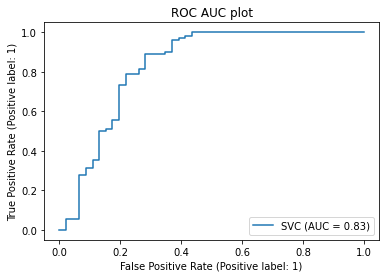

In [58]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(grid.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

final accuracy is 86% and AUC score is 83% which is pretty good